In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [ ]:
train_df= pd.read_csv('train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
features =['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
x= train_df[features]
y = train_df['SalePrice']

In [ ]:
#Split dataset
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Predict house prices
y_pred = model.predict(X_test)

In [ ]:
#Evaluate model
mse= mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean squared error : {mse}")
print(f"R-squared : {r2}")

Mean squared error : 2810942965.2180653
R-squared : 0.6335301929422245


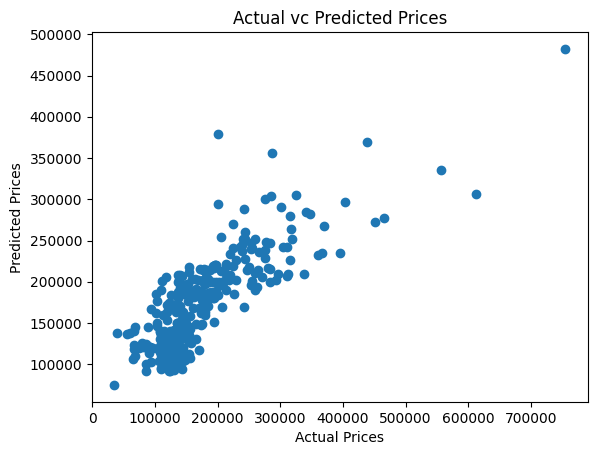

In [ ]:
#PLotting results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vc Predicted Prices")
plt.show()

In [ ]:
#Display
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

               Coefficient
GrLivArea       101.732566
BedroomAbvGr -26704.014676
FullBath      30848.028471
HalfBath       4611.653264


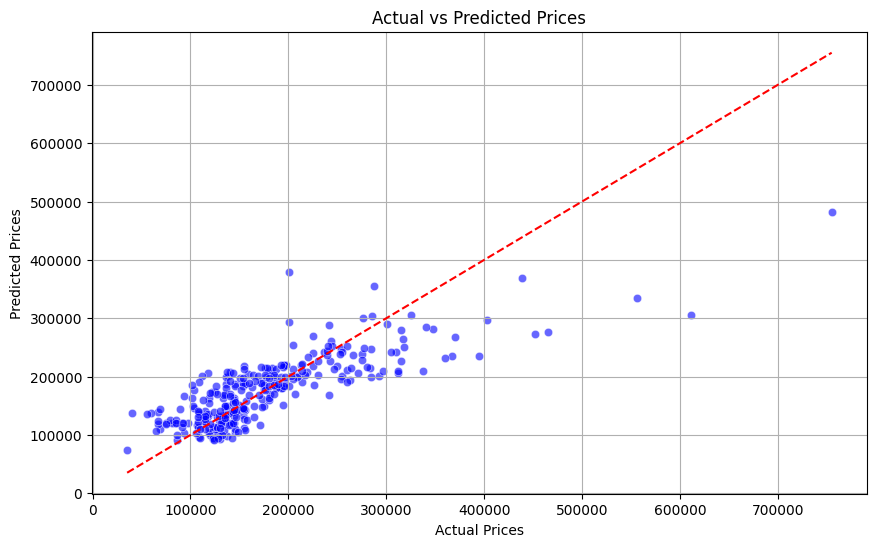

In [ ]:
#Enhanced plotting
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--') #Perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

In [ ]:
#Display model
coefficients = pd.DataFrame(model.coef_,features, columns=['Coefficient'])
print(coefficients)

               Coefficient
GrLivArea       101.732566
BedroomAbvGr -26704.014676
FullBath      30848.028471
HalfBath       4611.653264


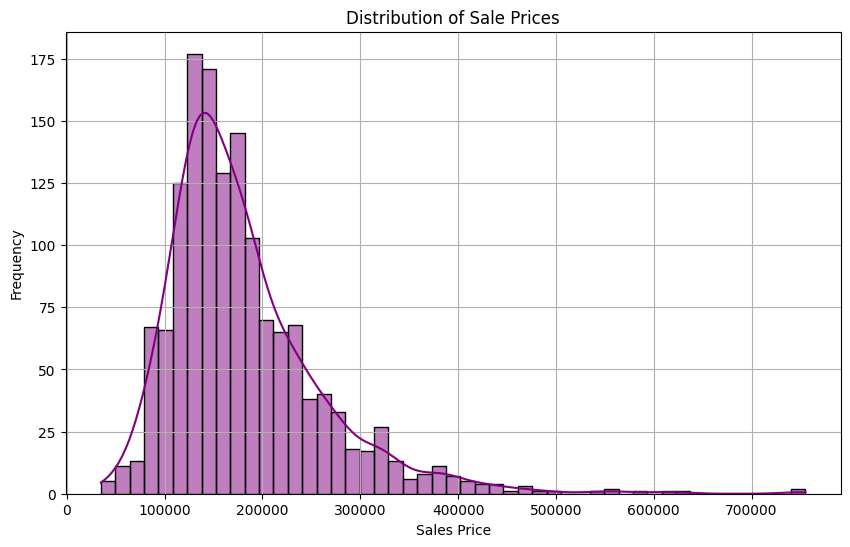

In [ ]:
#plot distribution
plt.figure(figsize=(10,6))
sns.histplot(train_df['SalePrice'], kde=True, color='purple')
plt.title("Distribution of Sale Prices")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

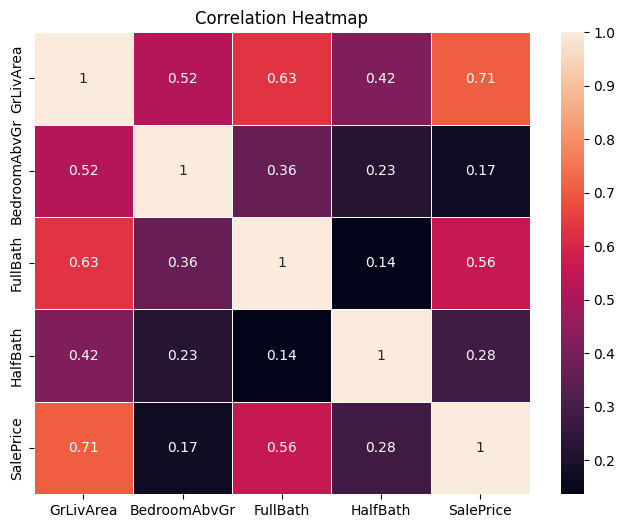

In [ ]:
#Correlation heatmap
plt.figure(figsize=(8,6))
corr_matrix = train_df[features + ['SalePrice']].corr()
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()